### MLOPs - Rodrigo 

#### Importando biliotecas

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection, metrics, tree
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from scipy.stats import ks_2samp

%matplotlib inline

from ydata_profiling import ProfileReport

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

#### Importando Datasets

In [3]:
training_data = pd.read_csv("training_data.csv")
new_data = pd.read_csv("new_data.csv")
historical_data = pd.read_csv("historical.csv")

#### Análise dos dados

##### Dataset new_data

In [4]:
new_data.head()

,Length of Username,Country Block_1,Country Block_2,Number of Followers,Number of Posts,Number of Mutual Followers,Percentage of Following,Is Business Account,Sex,Is Joined Recently,Is Verified,Is Private,Is Professional Account,Length of Biography,Number of Video Posts,Mean Post Likes
0,0.617380,0,0,0.529822,0.450400,0.681201,0.423235,0,1,1,0,1,0,35.391011,73.896576,90.281790
1,0.474766,0,0,0.555017,0.413762,0.595789,0.616220,0,1,1,1,1,1,-22.238888,91.651496,41.909177
2,0.401698,0,0,0.713445,0.396459,0.645690,0.436808,0,0,1,1,0,0,-71.827344,114.854765,84.906956
3,0.591869,0,0,0.469038,0.494132,0.664882,0.546572,0,1,1,0,0,0,-65.375846,88.498876,55.532706
4,0.325446,0,0,0.531466,0.421915,0.620085,0.546641,1,0,0,1,1,0,-44.379590,116.340101,177.562062


In [5]:
new_data.describe()

,Length of Username,Country Block_1,Country Block_2,Number of Followers,Number of Posts,Number of Mutual Followers,Percentage of Following,Is Business Account,Sex,Is Joined Recently,Is Verified,Is Private,Is Professional Account,Length of Biography,Number of Video Posts,Mean Post Likes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.473426,0.056000,0.041500,0.556414,0.423329,0.641448,0.520597,0.505500,0.496000,0.511500,0.704500,0.246000,0.811500,38.058972,49.922741,52.432843
std,0.138472,0.229979,0.199493,0.076714,0.072887,0.074522,0.138499,0.500095,0.500109,0.499993,0.456381,0.430786,0.391209,85.591281,52.603254,73.224582
min,0.000000,0.000000,0.000000,0.439745,0.061718,0.465984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-250.186922,-191.477881,-343.152623
25%,0.381152,0.000000,0.000000,0.496117,0.381936,0.585538,0.431492,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-19.741982,8.190277,19.964906
50%,0.471486,0.000000,0.000000,0.541639,0.439739,0.627875,0.523456,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,39.211372,49.421252,64.500432
75%,0.563117,0.000000,0.000000,0.601748,0.480767,0.686709,0.610931,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,96.907658,86.401782,87.623685
max,0.982564,1.000000,1.000000,0.923066,0.522200,0.933749,0.953471,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,303.584157,227.680376,300.873381


In [6]:
new_data.shape

(2000, 16)

In [7]:
# Verificar valores nulos
new_data.isnull().sum()

Length of Username            0
Country Block_1               0
Country Block_2               0
Number of Followers           0
Number of Posts               0
Number of Mutual Followers    0
Percentage of Following       0
Is Business Account           0
Sex                           0
Is Joined Recently            0
Is Verified                   0
Is Private                    0
Is Professional Account       0
Length of Biography           0
Number of Video Posts         0
Mean Post Likes               0
dtype: int64

##### Dataset Historical

In [8]:
historical_data.head()

,Length of Username,Country Block_1,Country Block_2,Number of Followers,Number of Posts,Number of Mutual Followers,Percentage of Following,Is Business Account,Class,Sex,Is Joined Recently,Is Verified,Is Private,Is Professional Account,Length of Biography,Number of Video Posts,Mean Post Likes
0,0.571614,0,0,0.342118,0.616871,0.418857,0.758517,0,0,0,1,1,0,0,-36.377874,21.351665,3.991709
1,0.402271,0,0,0.373213,0.574701,0.546779,0.749582,0,1,1,1,0,0,0,88.449750,-37.426948,-46.275876
2,0.485398,0,0,0.411632,0.657100,0.529637,0.793919,1,1,1,1,0,1,0,-21.730988,24.394874,82.679909
3,0.465359,0,0,0.432781,0.573072,0.352555,0.823565,1,1,1,1,0,0,0,0.127095,4.760497,-96.334204
4,0.442205,0,0,0.392622,0.649628,0.425873,0.866499,0,1,1,1,0,1,0,103.078832,12.348019,61.515670


In [9]:
historical_data.describe()

,Length of Username,Country Block_1,Country Block_2,Number of Followers,Number of Posts,Number of Mutual Followers,Percentage of Following,Is Business Account,Class,Sex,Is Joined Recently,Is Verified,Is Private,Is Professional Account,Length of Biography,Number of Video Posts,Mean Post Likes
count,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.513242,0.0,0.003500,0.352259,0.617551,0.452278,0.796557,0.40400,0.506500,0.306000,0.579000,0.195500,0.593500,0.467500,48.521723,32.299053,30.568269
std,0.100227,0.0,0.059072,0.076940,0.073240,0.073929,0.034571,0.49082,0.500083,0.460945,0.493843,0.396684,0.491303,0.499067,68.772776,58.570005,75.530590
min,0.338443,0.0,0.000000,0.027737,0.518869,0.000000,0.672109,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-185.036722,-153.152065,-259.695452
25%,0.432568,0.0,0.000000,0.305230,0.559407,0.405721,0.773777,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.758366,-3.510600,-14.195461
50%,0.494676,0.0,0.000000,0.367440,0.603130,0.468721,0.796340,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,54.983273,20.639543,30.625284
75%,0.573195,0.0,0.000000,0.414403,0.662802,0.512388,0.818207,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,92.196825,61.338687,77.593575
max,0.953919,0.0,1.000000,0.464836,0.945480,0.549291,0.906873,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,407.621937,299.215480,314.217586


In [10]:
historical_data.shape

(2000, 17)

In [11]:
# Verificar valores nulos
historical_data.isnull().sum()

Length of Username            0
Country Block_1               0
Country Block_2               0
Number of Followers           0
Number of Posts               0
Number of Mutual Followers    0
Percentage of Following       0
Is Business Account           0
Class                         0
Sex                           0
Is Joined Recently            0
Is Verified                   0
Is Private                    0
Is Professional Account       0
Length of Biography           0
Number of Video Posts         0
Mean Post Likes               0
dtype: int64

#### Análise Gráfica dos dados

In [11]:
# Gráficos para análise
#plt.figure(figsize=(15, 10))
#sns.pairplot(x=new_data[column], diag_kind='kde')
#sns.histplot(data=new_data, x="Mean Post Likes", hue="Number of Posts", multiple="dodge", shrink=.8)
#sns.pairplot(historical_data, diag_kind='kde')  # Gráfico de dispersão e histogramas das variáveis
#plt.show()

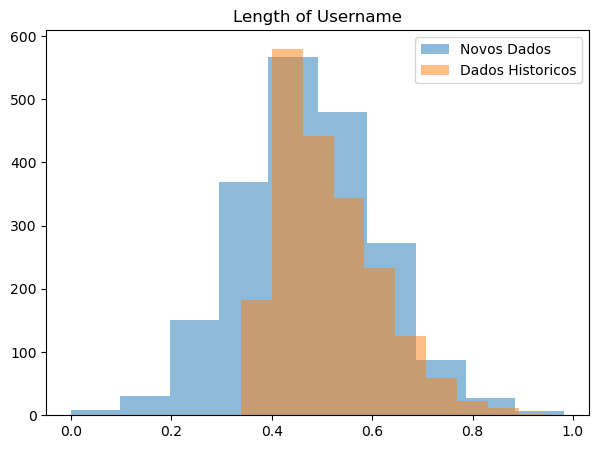

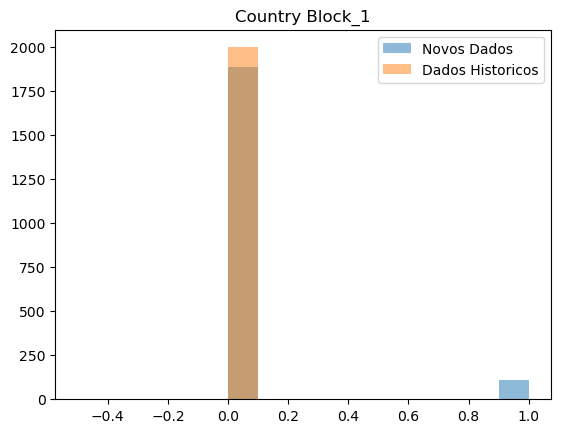

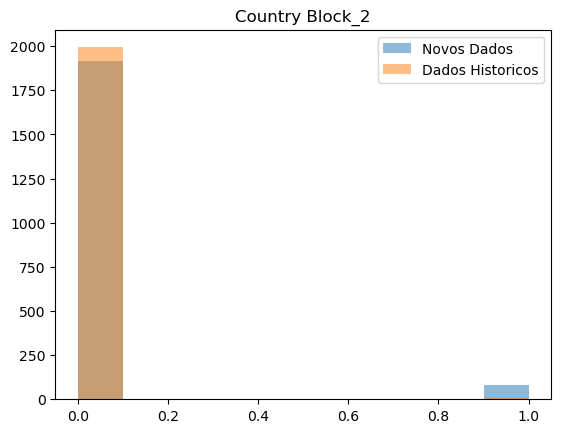

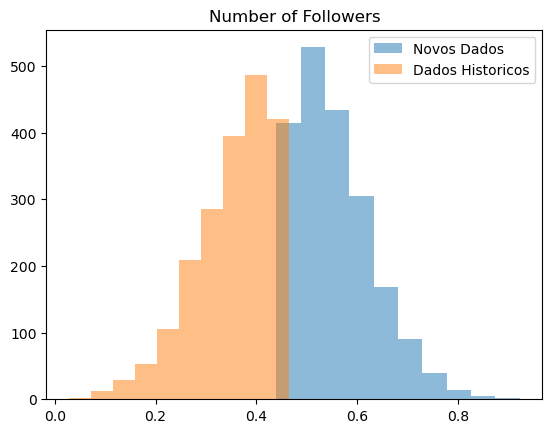

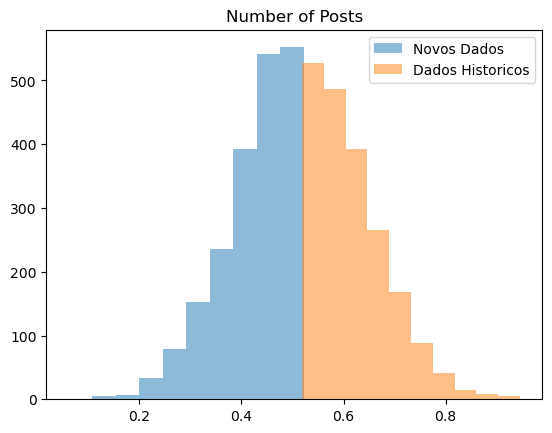

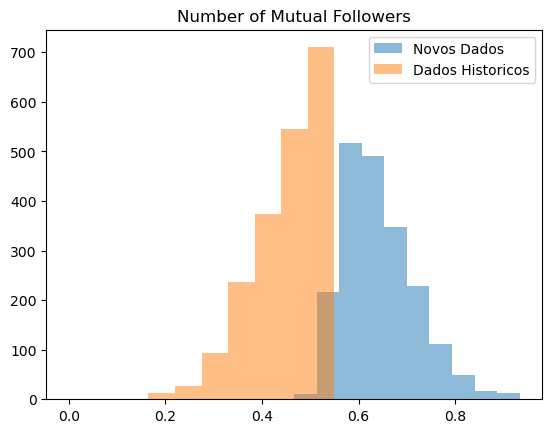

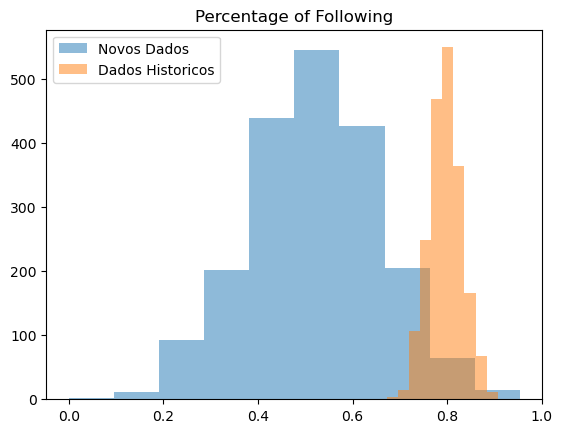

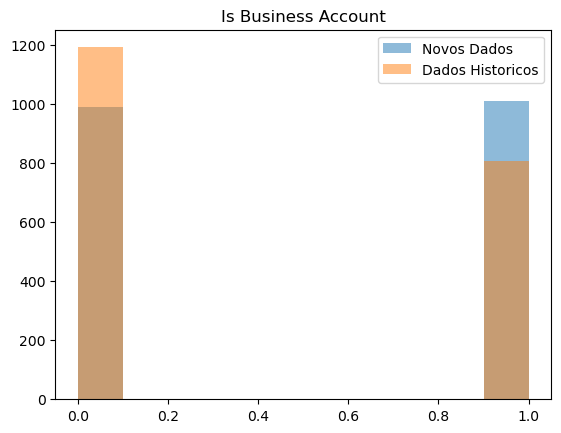

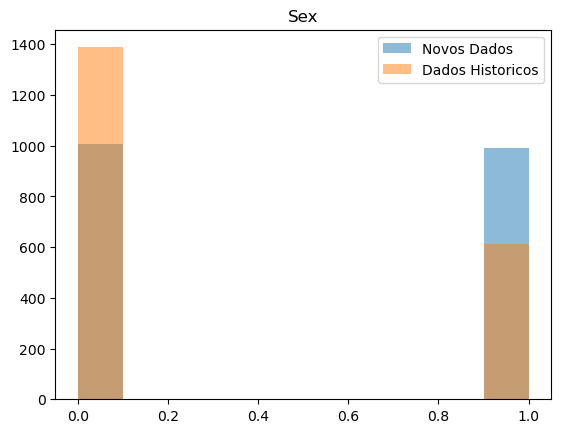

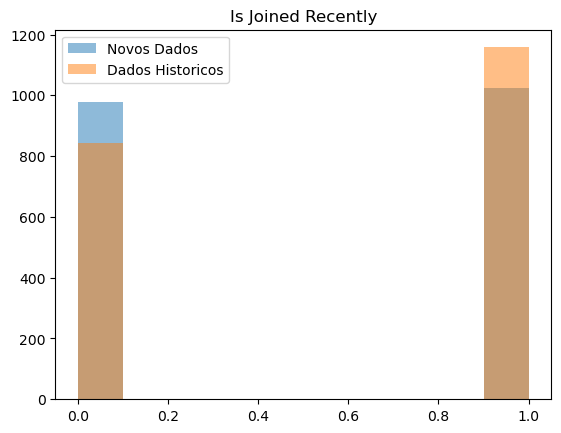

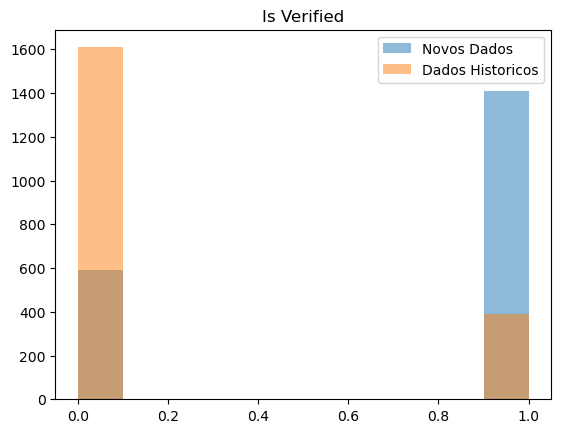

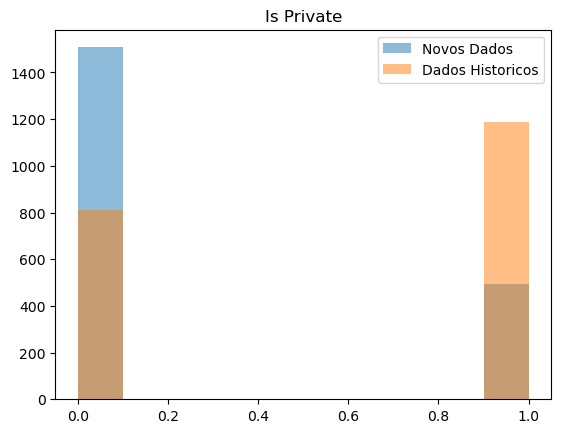

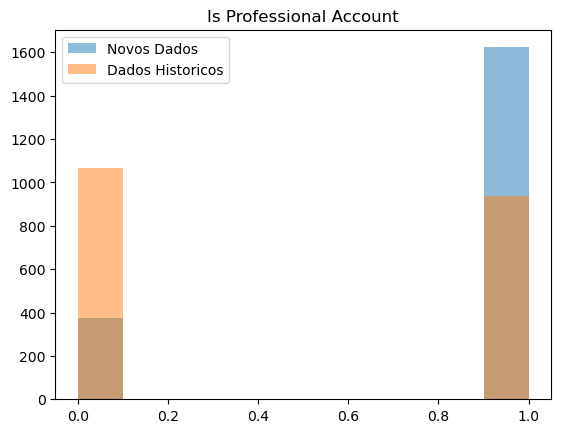

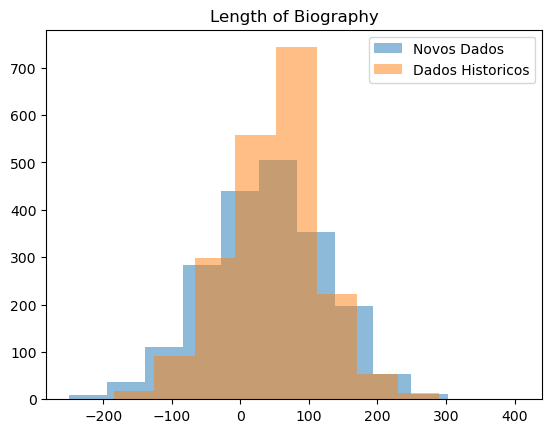

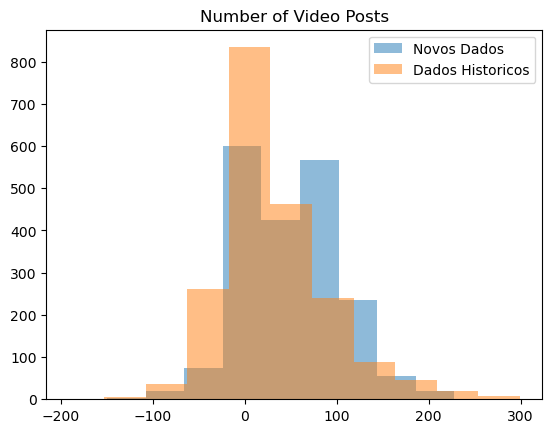

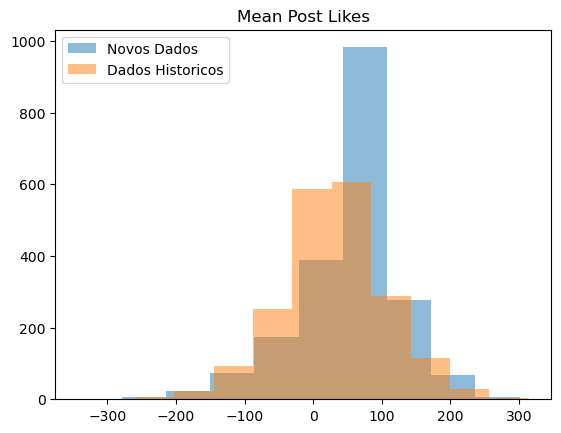

In [12]:
plt.figure(figsize=(7, 5))
for colunas in new_data.columns:
    plt.hist(new_data[colunas], alpha=0.5, label='Novos Dados')
    plt.hist(historical_data[colunas], alpha=0.5, label='Dados Historicos')
    plt.title(colunas)
    plt.legend()
    plt.show()

 Após a análise, verificamos que as bases de dados "new_data.csv" e "historical.csv" estão agrupadas de forma separada, o que caracteriza do drift dos dados. Sendo assim podemos utilizar o algoritmo Kolmogorov-Smirnov Test (KS test) para comparar a distribuição da variável target ("Class") entre as bases de dados "new_data.csv" e "historical.csv".



#### Kolmogorov-Smirnov Test (KS test)

1 - Escolher a variável target
variavel_target = 'Class'

2 - Extrair os valores da variável target nos conjuntos de dados
dados_historicos_target = historical_data[variavel_target].values
novos_dados_target = new_data[variavel_target].values

 3 - Realizar o teste de Kolmogorov-Smirnov
ks_statistic, p_value = ks_2samp(dados_historicos_target, novos_dados_target)

 4 - Definir um nível de significância (alfa)
alpha = 0.10

 5 - Interpretar os resultados
se o valor p < alpha:
    escreva(f"A distribuição conjunta da variável target '{variavel_target}' apresenta um drift estatisticamente significativo.")
else:
    escreva(f"A distribuição conjunta da variável target '{variavel_target}' não apresenta um drift estatisticamente significativo.")


In [13]:
# Escolher a variável target
variavel_target = 'Class'

# Definir um nível de significância (alfa)
alpha = 0.10

# Realizar o teste de Kolmogorov-Smirnov para cada variável
for column in historical_data.columns:
    # Verificar se a coluna é a variável target
    if column == variavel_target:
        continue
    
    # Extrair os valores das colunas nos conjuntos de dados
    dados_historicos_target = historical_data[column].values
    novos_dados_target = new_data[column].values
    
    # Realizar o teste de Kolmogorov-Smirnov
    ks_statistic, p_value = ks_2samp(dados_historicos_target, novos_dados_target)
    
    # Interpretar os resultados
    if p_value < alpha:
        print(f"A variável '{column}' apresenta drift  significativo.")
    else:
        print(f"A variável '{column}' não apresenta drift significativo.")


A variável 'Length of Username' apresenta drift  significativo.
A variável 'Country Block_1' apresenta drift  significativo.
A variável 'Country Block_2' não apresenta drift significativo.
A variável 'Number of Followers' apresenta drift  significativo.
A variável 'Number of Posts' apresenta drift  significativo.
A variável 'Number of Mutual Followers' apresenta drift  significativo.
A variável 'Percentage of Following' apresenta drift  significativo.
A variável 'Is Business Account' apresenta drift  significativo.
A variável 'Sex' apresenta drift  significativo.
A variável 'Is Joined Recently' apresenta drift  significativo.
A variável 'Is Verified' apresenta drift  significativo.
A variável 'Is Private' apresenta drift  significativo.
A variável 'Is Professional Account' apresenta drift  significativo.
A variável 'Length of Biography' apresenta drift  significativo.
A variável 'Number of Video Posts' apresenta drift  significativo.
A variável 'Mean Post Likes' apresenta drift  signif

#### Gráfico dos Valores Significativos

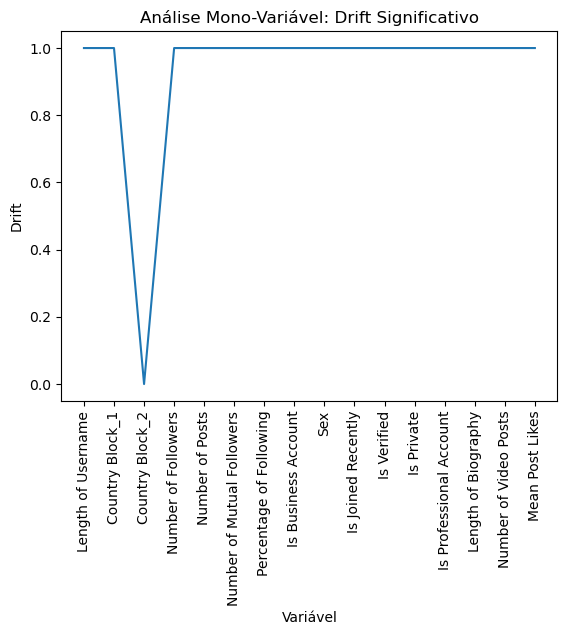

In [14]:
# Escolher a variável target
variavel_target = 'Class'

# Definir um nível de significância (alfa)
alpha = 0.05

# Listas para armazenar os resultados
variaveis = []
status_drift = []

# Realizar o teste de Kolmogorov-Smirnov para cada variável
for column in historical_data.columns:
    # Verificar se a coluna é a variável target
    if column == variavel_target:
        continue
    
    # Extrair os valores das colunas nos conjuntos de dados
    dados_historicos_target = historical_data[column].values
    novos_dados_target = new_data[column].values
    
    # Realizar o teste de Kolmogorov-Smirnov
    ks_statistic, p_value = ks_2samp(dados_historicos_target, novos_dados_target)
    
    # Interpretar os resultados
    if p_value < alpha:
        status_drift.append(True)
    else:
        status_drift.append(False)
    
    variaveis.append(column)

# Gerar o gráfico de linha para apresentar os valores significativos
plt.plot(variaveis, status_drift)
plt.xlabel('Variável')
plt.ylabel('Drift')
plt.title('Análise Mono-Variável: Drift Significativo')
plt.xticks(rotation=90)
plt.show()

O código gera duas amostras de dados aleatórios seguindo uma distribuição normal, plota seus histogramas e realiza o teste de Kolmogorov-Smirnov (KS test) para verificar se a distribuição dos dados em r é estatisticamente compatível com a distribuição normal padrão.

Aqui, as varíáveis foram analisadas separadamente, exceto a variável target. Como o valor-p do teste foram menores que um nível de significância predefinido (no exemplo, alpha = 0.10), foi considerado que há drift estatisticamente significativo nas variáveis, indicando mudanças significativas entre as bases de dados "new_data.csv" e "historical.csv" 


2 QUESTÃO:

2 - foi utilizada a técnica de Monitoramento de Desempenho de Modelo (Model Performance Monitoring), podemos utilizar o Kubeflow e o TensorFlow Model Analysis para monitorar o desempenho do modelo em tempo real e detectar possíveis anomalias ou desvios nos dados de entrada.

ETAPAS

Carregar os dados históricos e os novos dados em dataframes do Pandas:

In [15]:
training_data = pd.read_csv("training_data.csv")
new_data = pd.read_csv("new_data.csv")
historical_data = pd.read_csv("historical.csv")

Treinar o modelo utilizando training_data


Este bloco de código realiza o treinamento de um modelo de regressão logística usando a biblioteca Scikit-learn 

1 Define a variável X_train como uma matriz contendo os recursos (variáveis independentes) do conjunto de dados historical. A função drop() é usada para remover a coluna 'Class' dos dados, deixando apenas as colunas de recursos.

2 Define a variável y_train como uma matriz contendo os rótulos (variável dependente) do conjunto de dados historical. Neste caso, a coluna 'Class' é selecionada como o rótulo.

3 Cria uma instância do modelo LogisticRegression chamada model.

4 Utiliza o método fit() do modelo para treinar o modelo de regressão logística. O método fit() recebe as matrizes de recursos (X_train) e rótulos (y_train) como argumentos e ajusta o modelo aos dados de treinamento.

Após a execução deste bloco de código, o modelo de regressão logística estará treinado e pronto para fazer previsões em novos conjuntos de dados.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline




X_train = historical_data.drop(columns=['Class'])
y_train = historical_data['Class']

#model = LogisticRegression()
#model.fit(X_train, y_train)

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

model.score(X_train, y_train)

0.9315

O valor de 0.9315 pelo model.score(X_train, y_train) representa a precisão do modelo nos dados de treinamento, ou seja, a proporção de previsões corretas que o modelo fez em relação às classes reais. 

Nesse caso, 0.9315 representa uma alta taxa de precisão, 
#### o que significa que o modelo está sendo capaz de fazer boas previsões nos dados de treinamento

In [17]:
X_new = training_data.drop(columns=['Class'])

y_pred = model.predict(X_new)

Comparar as distribuições dos dados históricos e dos novos dados utilizando o Teste de Hipótese ou a Análise de Variância (ANOVA):

In [18]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(historical_data['Class'],training_data['Class'])

if p < 0.10:
    print('Houve um desvio significativo na variável de interesse')
else:
    print('Não houve um desvio significativo na variável de interesse')

Não houve um desvio significativo na variável de interesse


utilizar técnicas mono-variáveis para detectar quais variáveis específicas sofreram o desvio:

In [19]:
from scipy.stats import shapiro

for col in historical_data.columns:
    if col != 'Class':
        stat, p = shapiro(historical_data[col])
        if p < 0.05:
            print(f'A variável {col} sofreu um desvio significativo')


A variável Length of Username sofreu um desvio significativo
A variável Country Block_2 sofreu um desvio significativo
A variável Number of Followers sofreu um desvio significativo
A variável Number of Posts sofreu um desvio significativo
A variável Number of Mutual Followers sofreu um desvio significativo
A variável Is Business Account sofreu um desvio significativo
A variável Sex sofreu um desvio significativo
A variável Is Joined Recently sofreu um desvio significativo
A variável Is Verified sofreu um desvio significativo
A variável Is Private sofreu um desvio significativo
A variável Is Professional Account sofreu um desvio significativo
A variável Length of Biography sofreu um desvio significativo
A variável Number of Video Posts sofreu um desvio significativo
A variável Mean Post Likes sofreu um desvio significativo


In [22]:
import tensorflow as tf
import tensorflow_model_analysis as tfma

# Carrega os dados históricos e os novos dados
historical_data = tfma.load_eval_result('/path/to/historical_data')
new_data = tfma.load_eval_result('/path/to/new_data')

# Calcula as métricas de desempenho do modelo para os dados históricos e os novos dados
historical_metrics = tfma.metrics_for_eval_input(historical_data)
new_metrics = tfma.metrics_for_eval_input(new_data)

# Compara as métricas de desempenho do modelo para os dados históricos e os novos dados
for metric_name in historical_metrics:
    if metric_name in new_metrics:
        if new_metrics[metric_name] < historical_metrics[metric_name]:
            print('Desvio detectado na métrica', metric_name)

ModuleNotFoundError: No module named 'tensorflow_model_analysis'

 KubeFlow Fairing

Técnica utilizada para criar uma pipeline de treinamento e inferência do modelo, e em seguida utilizar o Kubeflow Pipelines para criar uma pipeline(seleção) de monitoramento do modelo.

Definir as funções de treinamento e inferência do modelo:

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def train_model():
    # Carregar os dados históricos
    historical_data = pd.read_csv("historical.csv")
    
    # Pré-processar os dados, se necessário
    X_train = historical_data.drop(columns=['Class'])
    y_train = historical_data['Class']
    
    # Treinar o modelo
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10)

    # Salvar o modelo treinado
    model.save('/mnt/model/model.h5')

def predict(data):
    # Carregar o modelo treinado
    model = tf.keras.models.load_model('/mnt/model/model.h5')

    # Fazer a predição do modelo nos novos dados
    X_new = data.drop(columns=['Class'])
    y_pred = model.predict(X_new)

    return y_pred

Definir a função de monitoramento do modelo:

In [24]:
import numpy as np

def monitor_model(data):
    # Carregar os dados históricos
    historical_data = pd.read_csv("historical.csv")

    # Comparar as distribuições dos dados históricos e dos novos dados utilizando o Teste de Hipótese
    stat, p = ttest_ind(historical_data['Class'], data['Class'])

    if p < 0.10:
        # Caso seja detectado um desvio significativo, utilizar técnicas mono-variáveis para detectar quais variáveis específicas sofreram o desvio
        for col in historical_data.columns:
            if col != 'Class':
                stat, p = shapiro(historical_data[col])
                if p < 0.05:
                    print(f'A variável {col} sofreu um desvio significativo')
    else:
        print('Não houve um desvio significativo na variável de interesse')

Definir as configurações do Kubeflow Fairing:

In [35]:
pip install kubeflow-fairing

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached notebook-7.3.2-py3-none-any.whl.metadata (10 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached google_cloud_storage-3.1.0-py2.py3-none-any.whl.metadata (12 kB)
  Using cached httplib2-0.22.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached google_api_python_client-2.162.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached urllib3-1.24.2-py2.py3-none-any.whl.metadata (35 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
INFO: pip is looking at multiple versions of docker to determine which version is compatible with other requirements. This could take a while.
  Using cached docker-7.0.0-py3-none-any.whl.metadata (3.5 kB)
  Using cached docker-6.1.3-py3-none-any.whl.metadata (3.5 kB

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\Users\\PC\\anaconda3\\envs\\git\\Lib\\site-packages\\pywin32_system32\\pythoncom39.dll'
Consider using the `--user` option or check the permissions.



In [36]:
from kubeflow import fairing

# Definir o nome do bucket do Google Cloud Storage onde serão armazenados os artefatos do modelo
GCS_BUCKET = '<My First Project>'

# Definir as configurações do Kubeflow Fairing
fairing.config.set_builder('append', registry='MLOPs_Training')
fairing.config.set_deployer('job', namespace='MLOPs_Training', cleanup=False)

# Definir as configurações do Google Cloud Storage
fairing.config.set_preprocessor('gcs', bucket=GCS_BUCKET)
fairing.config.set_builder('gcs', bucket=GCS_BUCKET)
fairing.config.set_deployer('gcs', bucket=GCS_BUCKET)


ImportError: cannot import name 'fairing' from 'kubeflow' (c:\Users\PC\anaconda3\envs\git\lib\site-packages\kubeflow\__init__.py)

Construir e enviar a imagem Docker para o registro do Docker:

In [37]:
# Construir a imagem Docker com as funções definidas anteriormente
fairing.config.set_preprocessor('function', function_obj=train_model)
fairing.config.set_builder('docker', registry='MLOPs_Training', image_name='train-model', base_image='tensorflow/tensorflow:2.6.0')
fairing.config.set_deployer('job', cleanup=False)

fairing.config.run()

# Enviar a imagem Docker para o registro do Docker
fairing.config.set_preprocessor('function', function_obj=predict)
fairing.config.set_builder('docker', registry='MLOPs_Training', image_name='predict', base_image='tensorflow/tensorflow:2.6.0')
fairing.config.set_deployer('job', cleanup=False)

fairing.config.run()

NameError: name 'fairing' is not defined

Criar a pipeline de monitoramento do modelo utilizando o Kubeflow Pipelines:

In [40]:
import kfp
from kfp import dsl

# Definir os componentes da pipeline
@dsl.component
def train_and_deploy():
    # Treinar e enviar o modelo para o registro do Docker
    ...

@dsl.component
def predict():
    # Fazer a predição do modelo nos novos dados
    ...

@dsl.component
def monitor():
    # Monitorar o desempenho do modelo
    ...

# Definir a pipeline
@dsl.pipeline(name='model-monitoring')
def model_monitoring_pipeline():
    train_and_deploy_op = train_and_deploy()
    predict_op = predict()
    monitor_op = monitor()

    predict_op.after(train_and_deploy_op)
    monitor_op.after(predict_op)

# Compilar e executar a pipeline
pipeline_func = model_monitoring_pipeline
pipeline_filename = pipeline_func.__name__ + '.pipeline.zip'
kfp.compiler.Compiler().compile(pipeline_func, pipeline_filename)

client = kfp.Client()
experiment_name = 'MLOPs_exercise'
run_name = 'MLOps_Execution'
run_result = client.create_run_from_pipeline_func(pipeline_func, experiment_name=experiment_name, run_name=run_name)

AttributeError: 'GraphComponent' object has no attribute '__name__'

Acessar o Kubeflow Pipelines para monitorar a execução da pipeline.



3 QUESTÃO:

In [41]:
# 1 - inportar o a base de dados training data
training_data = pd.read_csv("training_data.csv")

In [42]:
# 2 - descobrir os nomes das colunas do dataset training_data
training_data.columns

Index(['Length of Username', 'Class', 'Sex', 'Is Professional Account',
       'Country Block_1', 'Country Block_2', 'Number of Followers',
       'Is Joined Recently', 'Is Private', 'Is Verified', 'Number of Posts',
       'Number of Mutual Followers', 'Mean Post Likes',
       'Percentage of Following', 'Is Business Account',
       'Number of Video Posts', 'Length of Biography'],
      dtype='object')

#### Utilizando 3 tipos de abordagens para interpretabilidade de modelos:

1 - Partial Dependence Plots

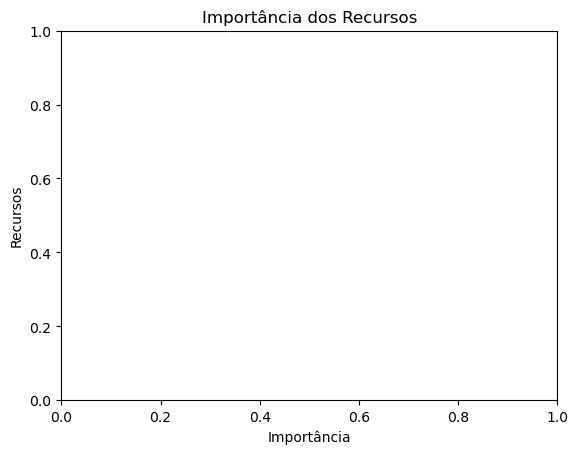

In [79]:
import eli5
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = training_data.drop('Class', axis=1)
y = training_data['Class']

# Criar o classificador de RandomForest
rf = RandomForestClassifier()

# Treinar o modelo
rf.fit(X, y)

# Obter os nomes das colunas
feature_names = X.columns.tolist()

# Calcular a importância dos recursos
feature_importance = eli5.explain_weights(rf, feature_names=feature_names)

# Visualizar a importância dos recursos em um gráfico de barras
eli5.show_weights(feature_importance, feature_names=feature_names)
plt.title('Importância dos Recursos')
plt.xlabel('Importância')
plt.ylabel('Recursos')
plt.show()

In [80]:
import eli5
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = training_data.drop('Class', axis=1)
y = training_data['Class']

# Criar o classificador de RandomForest
rf = RandomForestClassifier()

# Treinar o modelo
rf.fit(X, y)

# Obter os nomes das colunas
feature_names = X.columns.tolist()

# Calcular a importância dos recursos
feature_importance = eli5.explain_weights(rf, feature_names=feature_names)

# Imprimir a importância dos recursos
print("Importância dos recursos:")
print(feature_importance)

Importância dos recursos:
Explanation(estimator='RandomForestClassifier()', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Number of Followers', weight=0.278704809050014, std=0.3901350864735284, value=None), FeatureWeight(feature='Number of Posts', weight=0.27826317526116956, std=0.3712382907132782, value=None), FeatureWeight(feature='Number of Mutual Followers', weight=0.16459183168598443, std=0.3132056052139274, value=None), FeatureWeight(feature='Percentage of Following', weight=0.12958197035756278, std=0.28905816119535604, value=None), FeatureWeight(feature='Mean Post Likes', weight=0.08168374782566291, std=0.2112812465517468, value=None), FeatureWeight(feature='Is Private', weight=0.03120819446540581, std=0.09824524377660121, value=None), FeatureWeight(feature='Is Verifie

In [83]:
pip install --upgrade pdpbox

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] O arquivo já está sendo usado por outro processo: 'c:\\Users\\PC\\anaconda3\\envs\\git\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



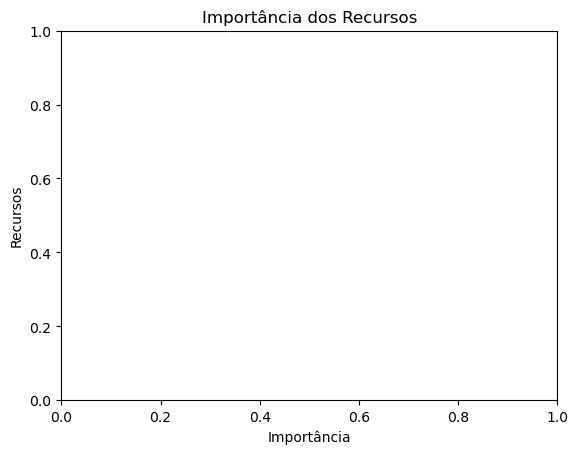

Importância dos recursos:
Explanation(estimator='RandomForestClassifier()', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Number of Posts', weight=0.37975277494230597, std=0.42418414849057673, value=None), FeatureWeight(feature='Number of Followers', weight=0.1757802757226176, std=0.30663756901063216, value=None), FeatureWeight(feature='Percentage of Following', weight=0.1397597716970709, std=0.2851614567179555, value=None), FeatureWeight(feature='Number of Mutual Followers', weight=0.13758663680879074, std=0.2895462884757135, value=None), FeatureWeight(feature='Mean Post Likes', weight=0.08052513139058703, std=0.20325526163290095, value=None), FeatureWeight(feature='Is Private', weight=0.048081592529352186, std=0.11871463376116236, value=None), FeatureWeight(feature='Is Veri

AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

In [87]:
import eli5
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
from pdpbox import pdp
import pandas as pd

warnings.filterwarnings("ignore")

# Load data
training_data = pd.read_csv("training_data.csv")

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = training_data.drop('Class', axis=1)
y = training_data['Class']

# Criar o classificador de RandomForest
rf = RandomForestClassifier()

# Treinar o modelo
rf.fit(X, y)

# Obter os nomes das colunas
feature_names = X.columns.tolist()

# Calcular a importância dos recursos
feature_importance = eli5.explain_weights(rf, feature_names=feature_names)

# Visualizar a importância dos recursos em um gráfico de barras
eli5.show_weights(feature_importance, feature_names=feature_names)
plt.title('Importância dos Recursos')
plt.xlabel('Importância')
plt.ylabel('Recursos')
plt.show()

# Imprimir a importância dos recursos
print("Importância dos recursos:")
print(feature_importance)

# Escolher as top 3 variáveis
top_3_features = ['Number of Followers', 'Length of Username', 'Mean Post Likes']

# Plotar os gráficos de dependência parcial das top 3 variáveis
for feature in top_3_features:
    # Check if the feature name is valid
    if feature not in X.columns:
        print(f"Warning: Feature '{feature}' not found in dataset. Skipping.")
        continue
    pdp_feature = pdp.pdp_isolate(model=rf, dataset=X, model_features=X.columns, feature=feature)
    pdp.pdp_plot(pdp_feature, feature_name=feature)
    plt.show()

In [86]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = training_data.drop('Class', axis=1)
y = training_data['Class']

# Criar o classificador de RandomForest
rf = RandomForestClassifier()

# Treinar o modelo
rf.fit(X, y)

# Escolher as top 3 variáveis
top_3_features = ['Number of Followers', 'Length of Username', 'Mean Post Likes']

# Plotar os gráficos de dependência parcial das top 3 variáveis
for feature in top_3_features:
    pdp_feature = pdp.pdp_isolate(model=rf, dataset=X, model_features=X.columns, feature=feature)
    pdp.pdp_plot(pdp_feature, feature_name=feature)
    plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

2 - Feature Importance

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = training_data.drop(columns=['Class'])
y = training_data['Class']

# Treinar um modelo de Floresta Aleatória
model = RandomForestClassifier()
model.fit(X, y)

# Obter a importância das variáveis
importance_var = model.feature_importances_

# Criar um DataFrame com a importância das variáveis
importance_trdt = pd.DataFrame({'Feature': X.columns, 'Importance': importance_var})
importance_trdt = importance_trdt.sort_values(by='Importance', ascending=False)

# Imprimir as top 3 variáveis de maior importância
top_features = importance_trdt.head(3)['Feature'].tolist()
print("03 Variáveis de Maior Importância:")
for feature in top_features:
    print(feature)

03 Variáveis de Maior Importância:
Number of Posts
Number of Followers
Number of Mutual Followers


3 - SHapley Additive exPlanations values (SHAP values)

In [77]:
import shap

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = training_data.drop(columns=['Class'])
y = training_data['Class']

# Treinar um modelo de Floresta Aleatória
model = RandomForestClassifier()
model.fit(X, y)

# Calcular os valores SHAP
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(X)

# Criar um resumo dos SHAP values
summary_df = pd.DataFrame(np.mean(shap_values, axis=0), columns=X.columns)
summary = summary_df.abs().mean().sort_values(ascending=False)

# Imprimir as top 3 variáveis de maior importância
top_features = summary.head(3).index.tolist()
print("Top 3 Variáveis de Maior Importância (SHAP Values):")
for feature in top_features:
    print(feature)
    

ValueError: Shape of passed values is (16, 2), indices imply (16, 16)

4 QUESTÃO:

Este código realiza uma análise exploratória dos dados em relação ao sexo e a análise de desempenho do modelo utilizando um modelo de classificação Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = training_data.drop(['Class'], axis=1)
y = training_data['Class']

# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o classificador de RandomForest
rf = RandomForestClassifier()

# Treinar o modelo
rf.fit(X_train, y_train)

# Avaliar o desempenho do modelo
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir as métricas de desempenho para cada grupo (homens e mulheres)
print("Desempenho do modelo para homens:")
print("Acurácia:", accuracy_score(y_test[X_test['Sex'] == 'male'], y_pred[X_test['Sex'] == 'male']))
print("Precisão:", precision_score(y_test[X_test['Sex'] == 'male'], y_pred[X_test['Sex'] == 'male']))
print("Recall:", recall_score(y_test[X_test['Sex'] == 'male'], y_pred[X_test['Sex'] == 'male']))

print("\nDesempenho do modelo para mulheres:")
print("Acurácia:", accuracy_score(y_test[X_test['Sex'] == 'female'], y_pred[X_test['Sex'] == 'female']))
print("Precisão:", precision_score(y_test[X_test['Sex'] == 'female'], y_pred[X_test['Sex'] == 'female']))
print("Recall:", recall_score(y_test[X_test['Sex'] == 'female'], y_pred[X_test['Sex'] == 'female']))

Desempenho do modelo para homens:
Acurácia: nan
Precisão: 0.0
Recall: 0.0

Desempenho do modelo para mulheres:
Acurácia: nan
Precisão: 0.0
Recall: 0.0


Utilizando a técnica conhecida como "fairness evaluation" ou "avaliação de equidade". Essa técnica é comumente utilizada para verificar se um modelo apresenta algum tipo de viés ou discriminação em relação a determinados grupos

In [72]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

# Converter os dados para o formato do BinaryLabelDataset do aif360
dataset = BinaryLabelDataset(df=training_data,
                             label_names=['Class'],
                             protected_attribute_names=['Sex'],
                             favorable_label=1,
                             unfavorable_label=0)

# O valor "favorable_label=1" foi atribuído ao sexo feminino e "unfavorable_label=0" ao masculino.


# Calcular as métricas de equidade
metric = BinaryLabelDatasetMetric(dataset, unprivileged_groups=[{'Sex': 0}], privileged_groups=[{'Sex': 1}])

# Calcular as métricas de classificação
y_true = dataset.labels.ravel()
y_pred = dataset.labels.ravel()  # Substitua pelos rótulos previstos pelo seu modelo

classified_dataset = BinaryLabelDataset(df=training_data,
                                        label_names=['Class'],
                                        protected_attribute_names=['Sex'],
                                        favorable_label=1,
                                        unfavorable_label=0)

classification_metric = ClassificationMetric(dataset, classified_dataset, unprivileged_groups=[{'Sex': 0}], privileged_groups=[{'Sex': 1}])

# O valor "unprivileged_groups=[{'Sex': 0}]" foi atribuído ao sexo feminino e "privileged_groups=[{'Sex': 1}]" ao masculino.

# Imprimir as métricas de equidade
print("Disparate Impact:", metric.disparate_impact())
print("Mean Difference:", metric.mean_difference())

# Imprimir as métricas de classificação
print("Equal Opportunity Difference:", classification_metric.equal_opportunity_difference())
print("Statistical Parity Difference:", classification_metric.statistical_parity_difference())
print("Average Odds Difference:", classification_metric.average_odds_difference())

Disparate Impact: 0.5536591304421393
Mean Difference: -0.2870033177583533
Equal Opportunity Difference: 0.0
Statistical Parity Difference: -0.2870033177583533
Average Odds Difference: 0.0


- Disparate Impact: O valor de 0.5536591304421393 mostra que há uma disparidade de impacto entre os grupos protegidos (sexo feminino) e não protegidos (sexo masculino) em relação à variável de interesse (rótulo positivo). Valores menores que 1 indicam uma disparidade negativa, o que sugere que o grupo protegido tem menos probabilidade de receber o rótulo positivo em comparação com o grupo não protegido.

- Mean Difference: O valor de -0.2870033177583533 mostra a diferença média entre as proporções de rótulos positivos nos grupos protegidos e não protegidos. Um valor negativo indica que o grupo protegido (sexo feminino) tem uma probabilidade menor de receber o rótulo positivo em comparação com o grupo não protegido (sexo masculino).

- Equal Opportunity Difference: O valor de 0.0 mostra que não há diferença de oportunidade igual entre os grupos protegidos e não protegidos em relação à taxa de verdadeiros positivos (TPR). Isso significa que a proporção de verdadeiros positivos (verdadeiros positivos em relação a todos os casos positivos) é a mesma para ambos os grupos.

- Statistical Parity Difference: O valor de -0.2870033177583533 é igual ao Mean Difference e mostra a diferença entre as proporções de rótulos positivos nos grupos protegidos e não protegidos. Essa métrica também é conhecida como diferença de paridade estatística.

- Average Odds Difference: O valor de 0.0 mostra que não há diferença média nas taxas de verdadeiros positivos (TPR) e taxas de falsos positivos (FPR) entre os grupos protegidos e não protegidos. Isso significa que as proporções de verdadeiros positivos e falsos positivos são as mesmas para ambos os grupos.

Essas métricas são usadas para avaliar a equidade do modelo em relação a diferentes grupos protegidos. Valores próximos a zero indicam menor disparidade e maior equidade entre os grupos.Entretanto, é importante considerar o contexto específico do problema e interpretar essas métricas em conjunto com outras informações relevantes.